In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Final_Portfolio/Classification/Assignment-2_Data.csv")
print("Dataset Loaded Successfully")

Dataset Loaded Successfully


In [7]:
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.shape

(45211, 18)

In [9]:
df.columns

Index(['Id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45199 non-null  float64
 2   job        45210 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


In [11]:
df.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45199.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.933627,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.623149,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
df.isna().sum()

,0
Id,0
age,12
job,1
marital,0
education,0
default,0
balance,3
housing,0
loan,0
contact,0


There is null value in age, job and balance which are small in n umber so let's drop the null values

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

,0
Id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


In [15]:
df.duplicated().sum()

0

In [16]:
df1=df.copy()

Data Preprocessing

In [17]:
df1['balance']=df1['balance'].astype('int')

In [18]:
for col in df.columns:
    print(col)
    print(df1[col].unique().tolist())
    print('-'*120)

Id
[1004, 1005, 1006, 1007, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 

In [19]:
df1[df1['age']<=0]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45203,46204,-1.0,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,46205,-1.0,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,46206,-1.0,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


Since some of the values of age are negative so let's remove it

In [20]:
df1=df1[df1['age']>0]

Now we have negative values in the balanced data as well so lets us remove the '-' sign from it as there are around 4000 such data

In [21]:
df1[df1['balance']<0]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,1026,44.0,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,1029,46.0,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,1037,25.0,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,1038,53.0,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,1046,36.0,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,45627,31.0,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes
44629,45630,28.0,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes
44836,45837,33.0,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no
44908,45909,48.0,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no


In [22]:
df1['balance']=df1['balance'].astype(str).str.replace('-','').astype(float)

In [23]:
df1[df1['balance']<0]

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


Now let's remove the negative values from pdays and make it 0 as -1 means never contacted

In [24]:
df['pdays']=df['pdays'].astype(str).str.replace('-1','0').astype(np.int64)

In [25]:
df.drop(columns='Id',inplace=True)

In [26]:
num_columns=df1.select_dtypes(exclude=['object'])
cat_columns=df1.select_dtypes(include=['object'])

In [27]:
cat_columns

,job,marital,education,default,housing,loan,contact,month,poutcome,y
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
5,management,married,tertiary,no,yes,no,unknown,may,unknown,no
6,management,single,tertiary,no,yes,yes,unknown,may,unknown,no
10,admin.,divorced,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


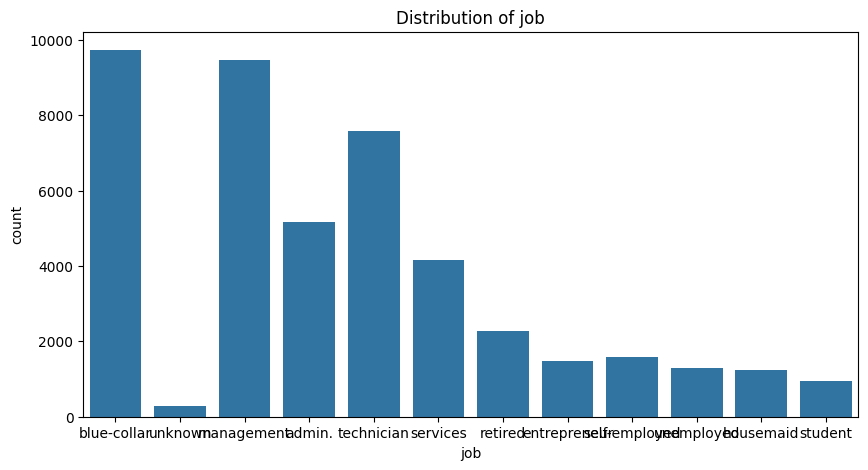

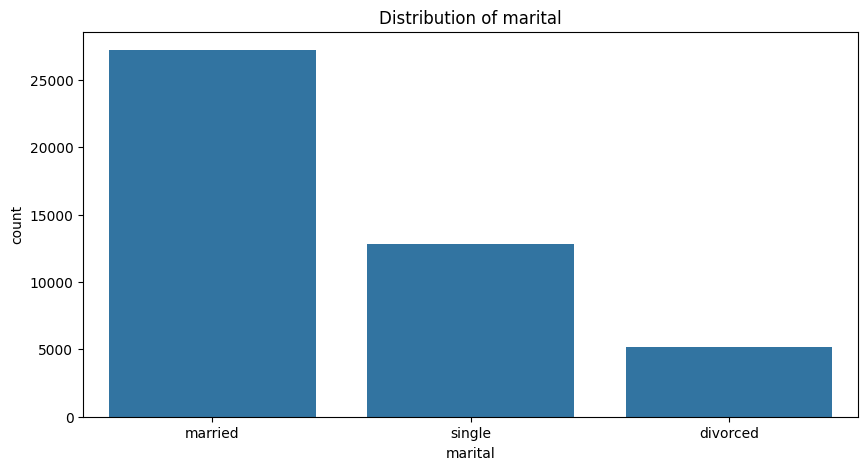

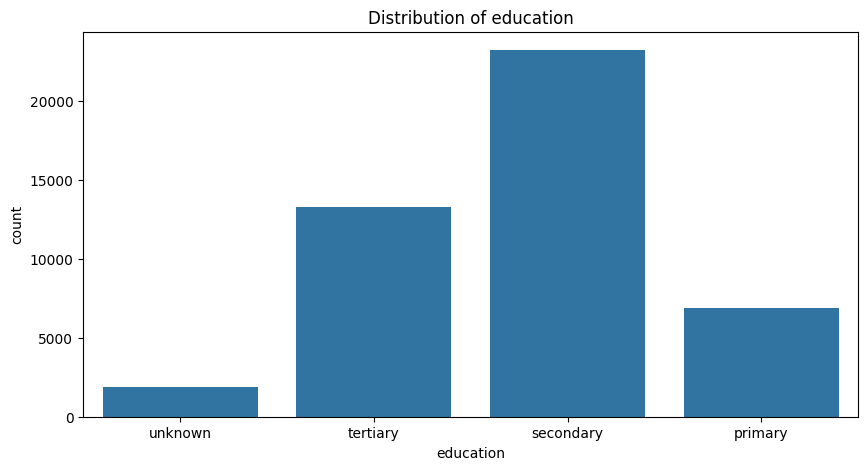

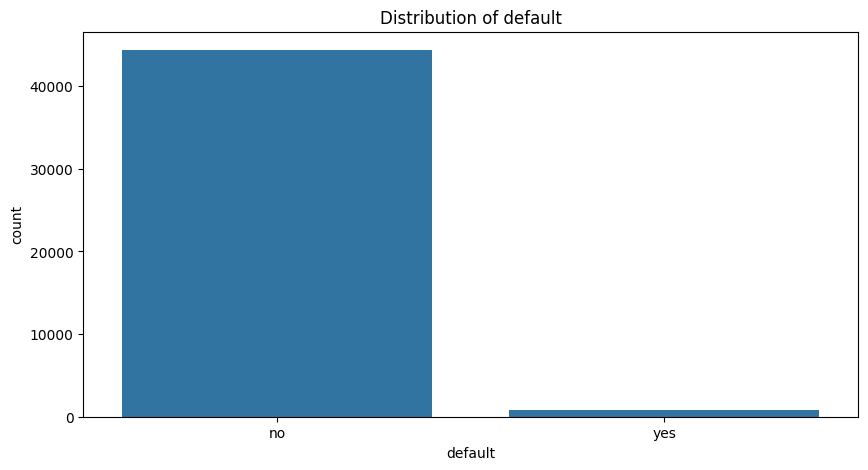

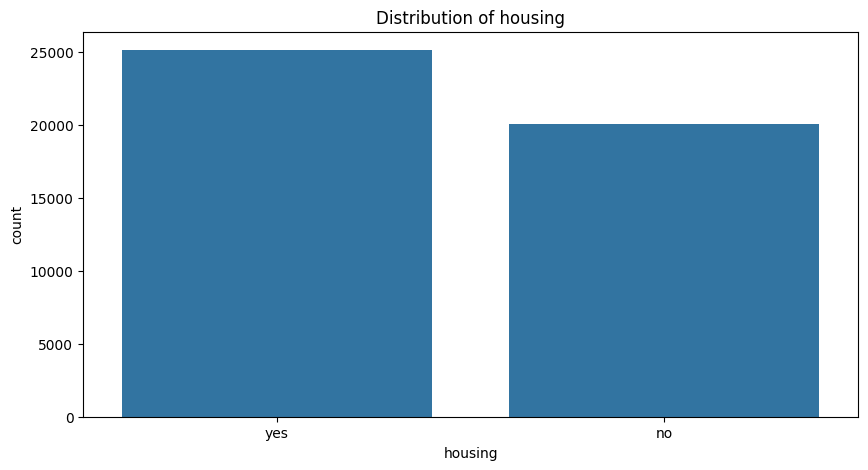

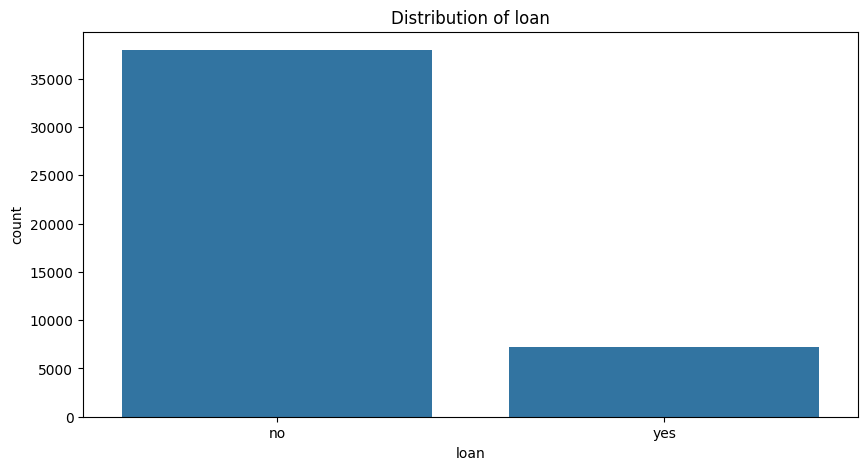

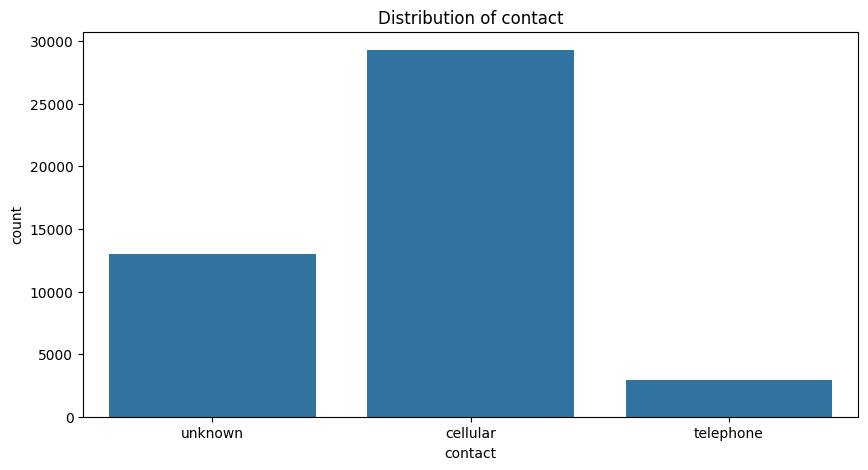

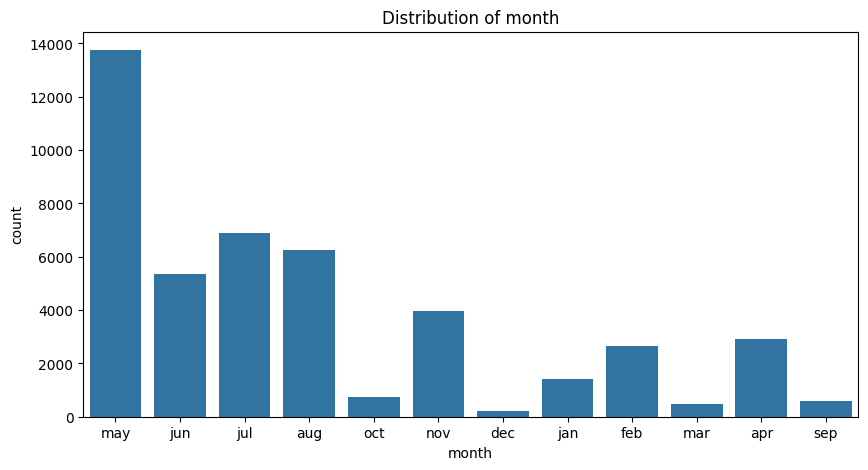

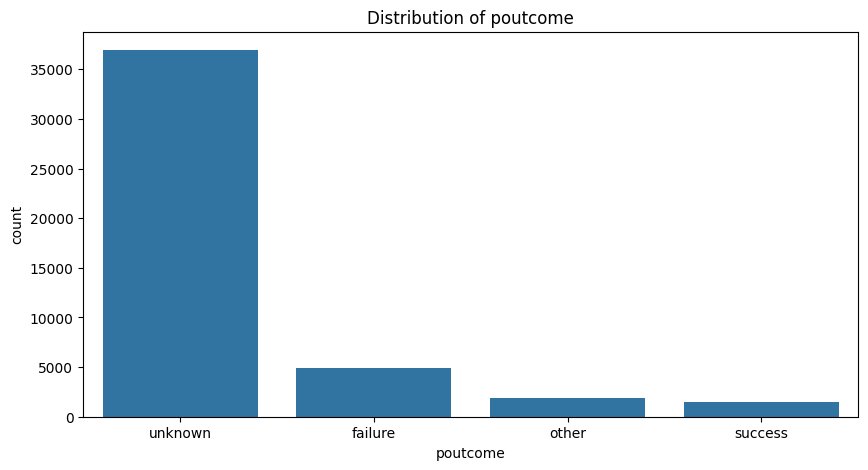

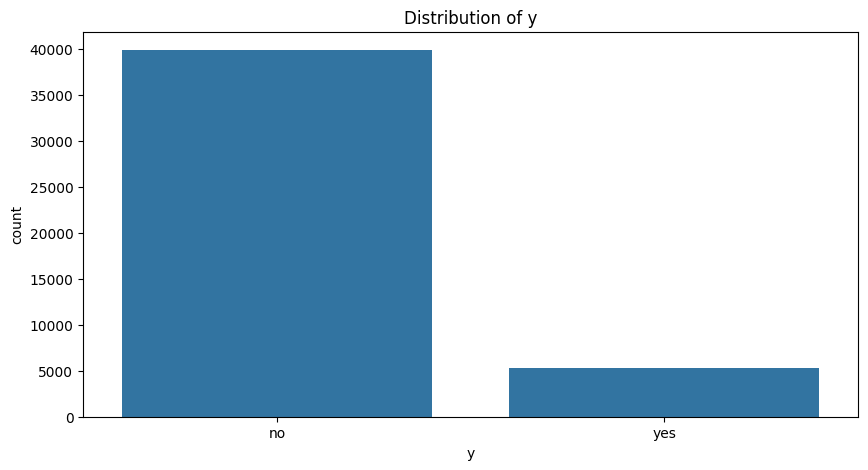

In [28]:
for col in cat_columns.columns:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col,data=df)
  plt.title(f'Distribution of {col}')
  plt.show()


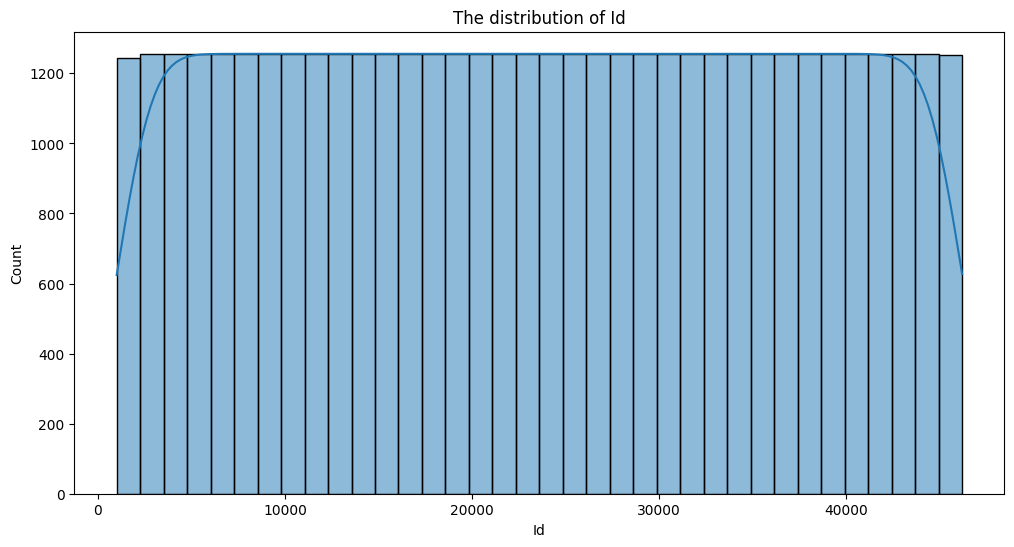

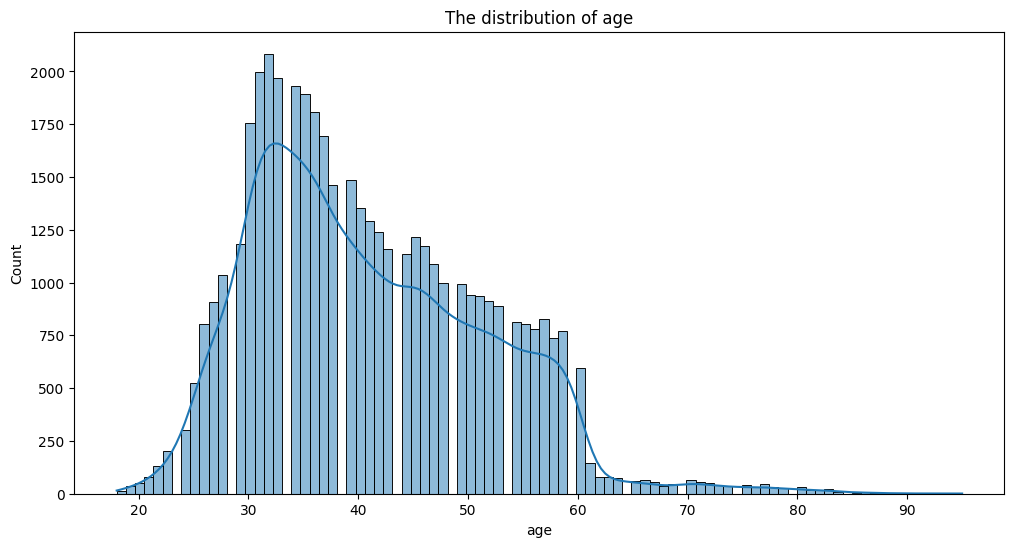

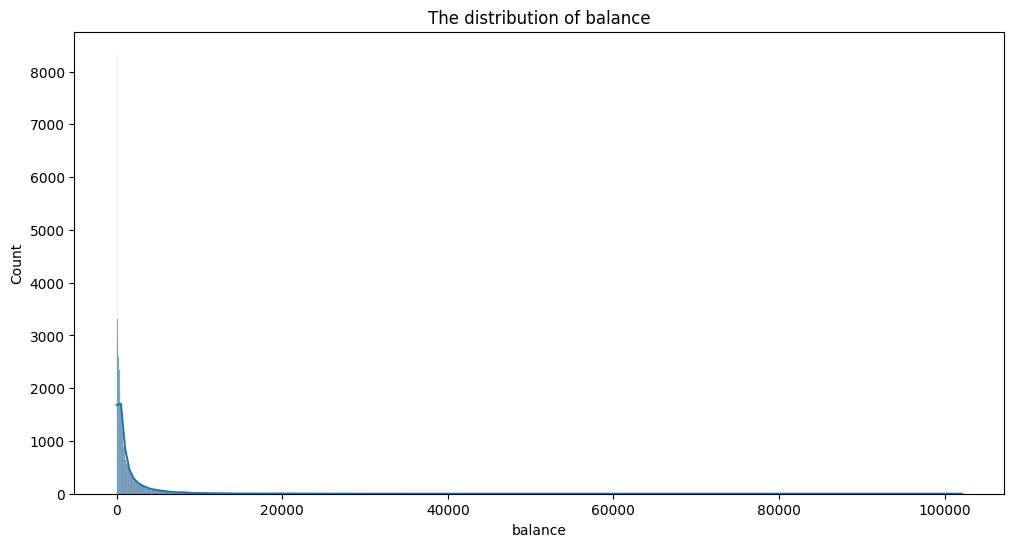

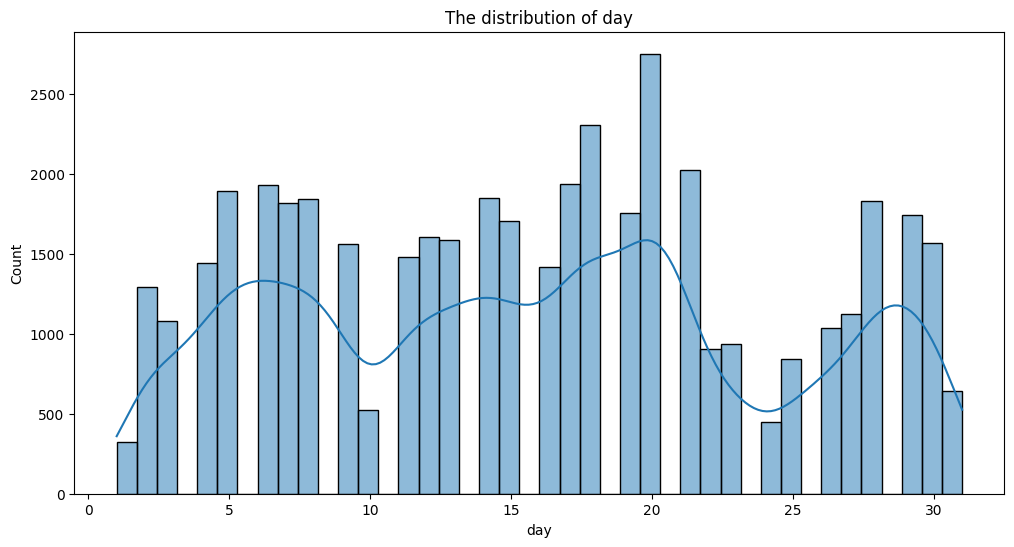

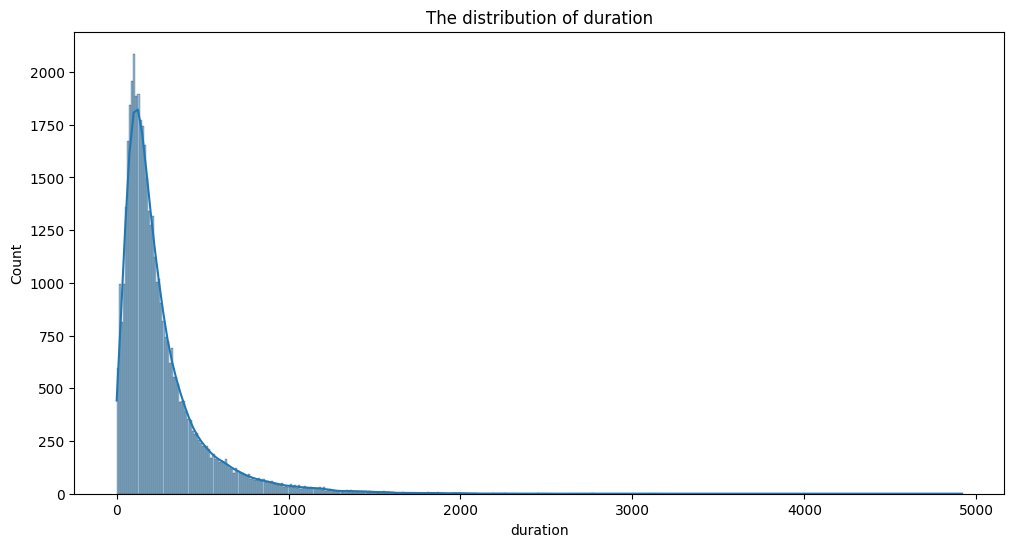

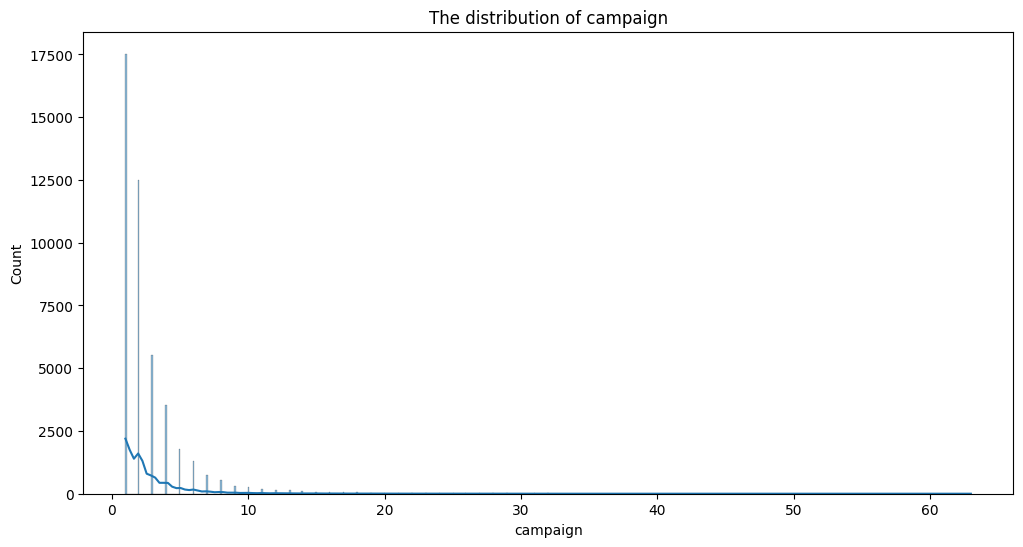

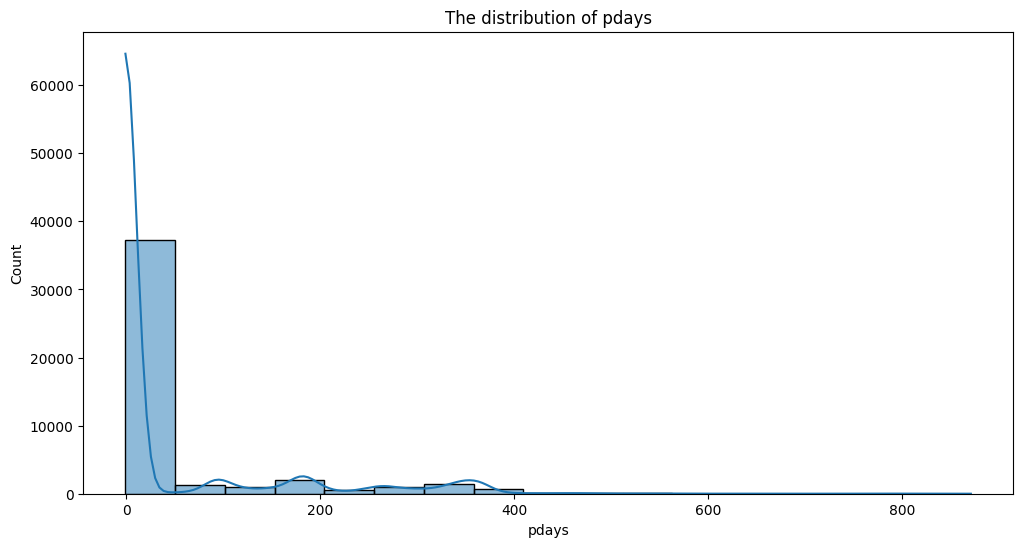

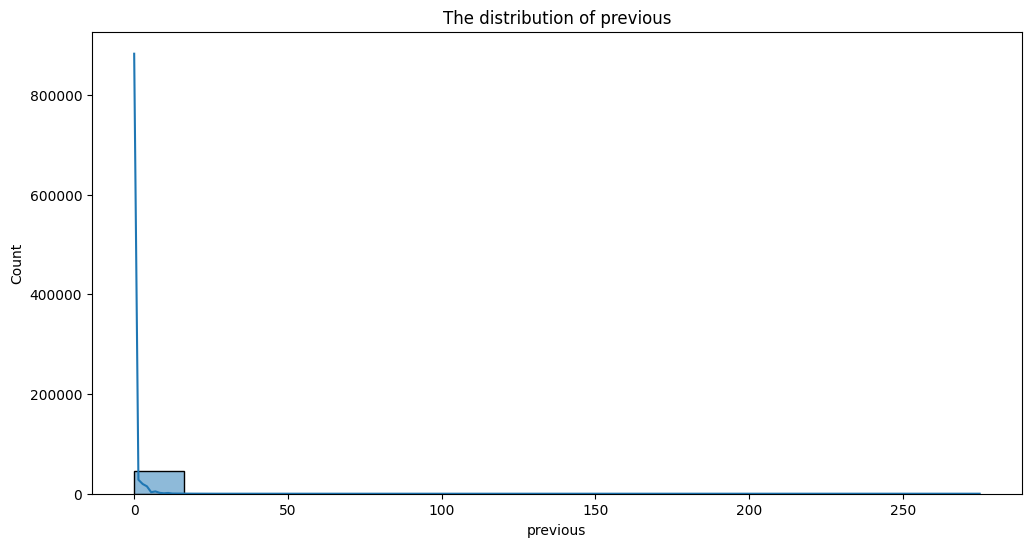

In [29]:
for col in num_columns.columns:
  plt.figure(figsize=(12,6))
  sns.histplot(df1[col],kde=True)
  plt.title(f'The distribution of {col}')
  plt.show()

Check for outliers

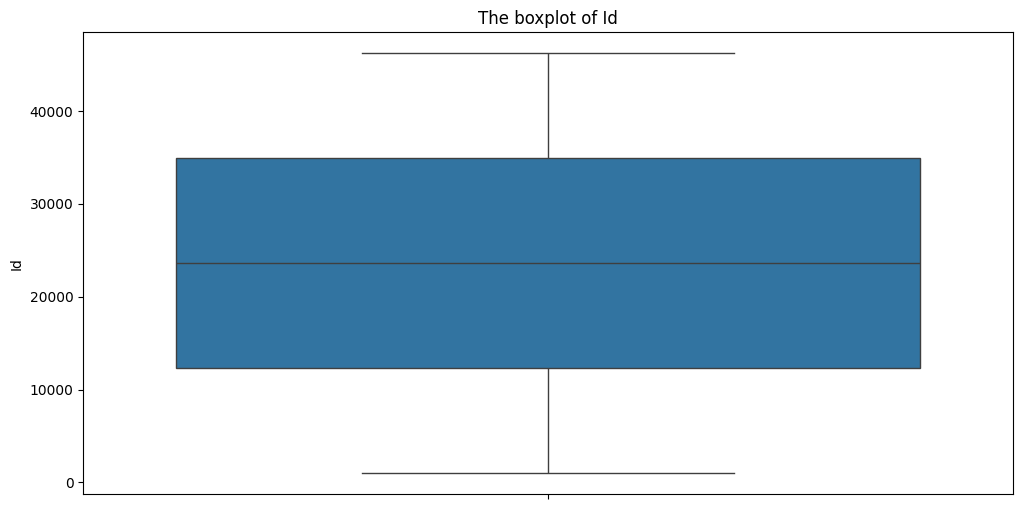

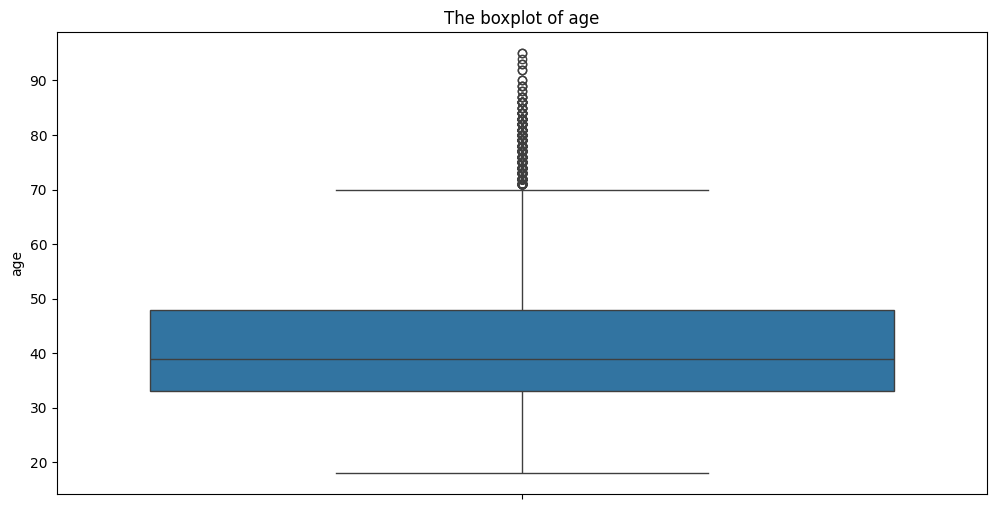

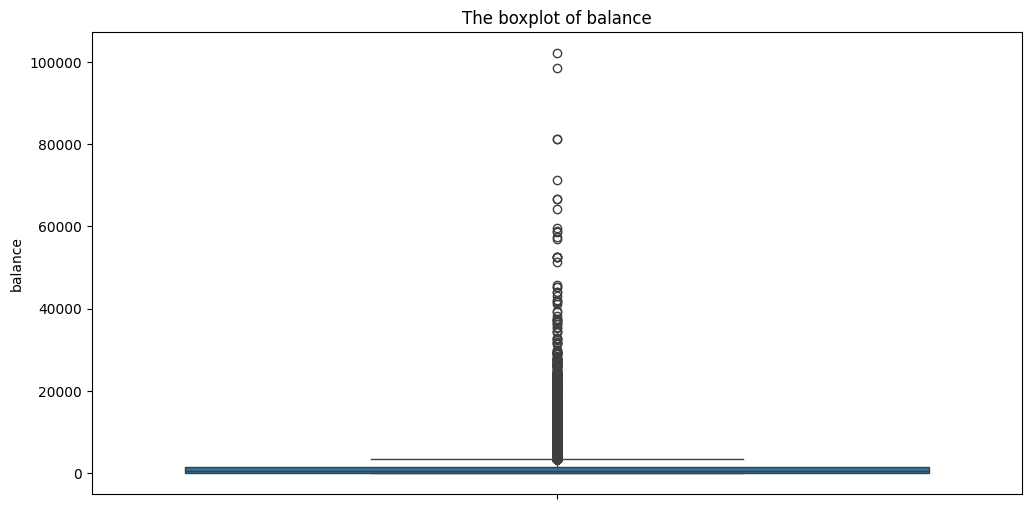

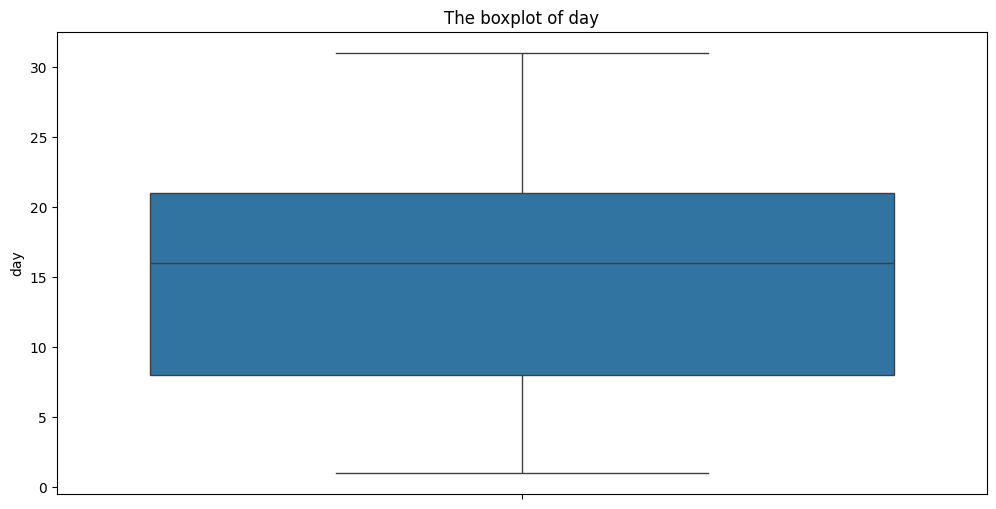

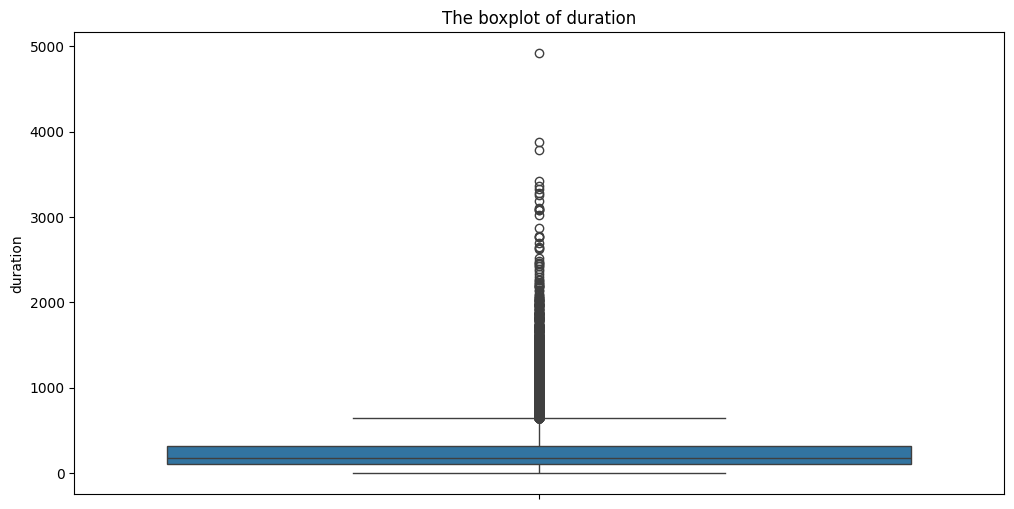

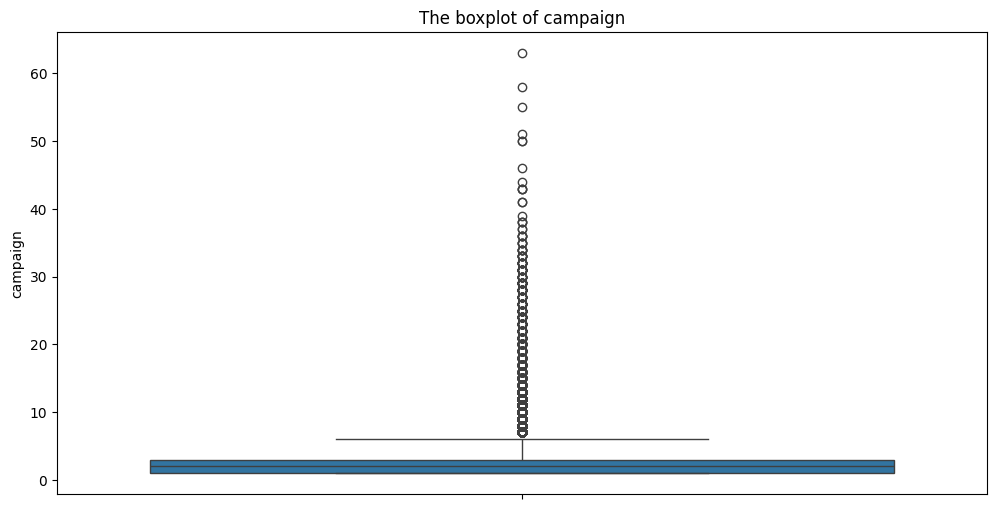

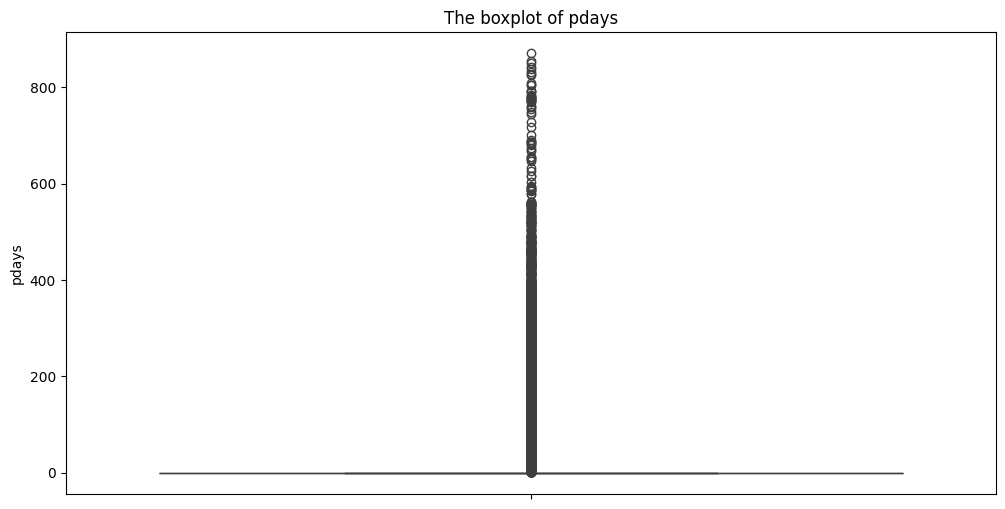

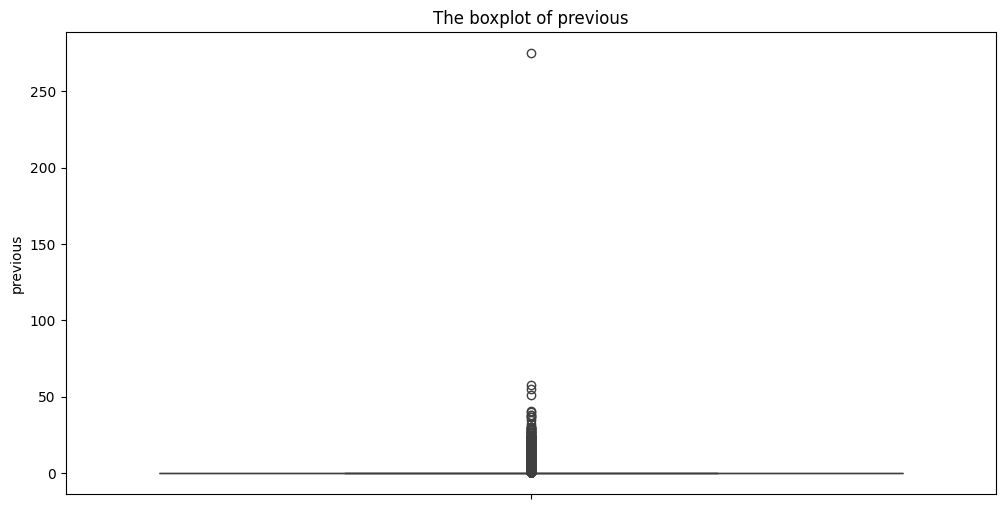

In [30]:
for col in num_columns.columns:
  plt.figure(figsize=(12,6))
  sns.boxplot(df1[col])
  plt.title(f'The boxplot of {col}')
  plt.show()

In [31]:
df['default']

,default
3,no
4,no
5,no
6,no
10,no
...,...
45206,no
45207,no
45208,no
45209,no


In [32]:
def remove_outliers(df, q1=0.05, q3=0.95):
    df_filtered = df1.copy()

    for col in df_filtered.select_dtypes(include=['number']).columns:
        Q1 = df_filtered[col].quantile(q1)
        Q3 = df_filtered[col].quantile(q3)
        IQR = Q3 - Q1
        df_filtered = df_filtered[(df_filtered[col] >= Q1 - 1.5 * IQR) & (df_filtered[col] <= Q3 + 1.5 * IQR)]

    return df_filtered


df_cleaned = remove_outliers(df1)

In [33]:
df_cleaned.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,1006,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,1007,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
10,1011,41.0,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,-1,0,unknown,no


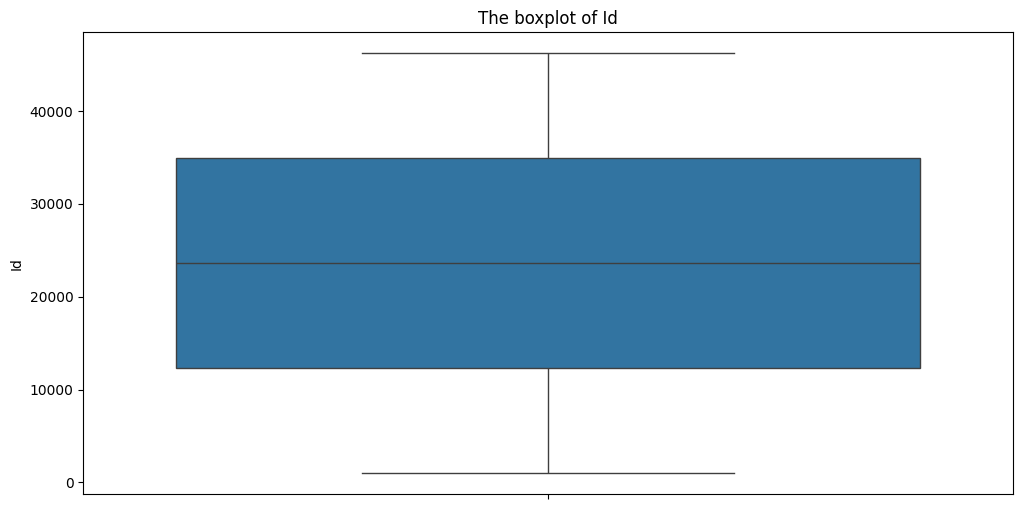

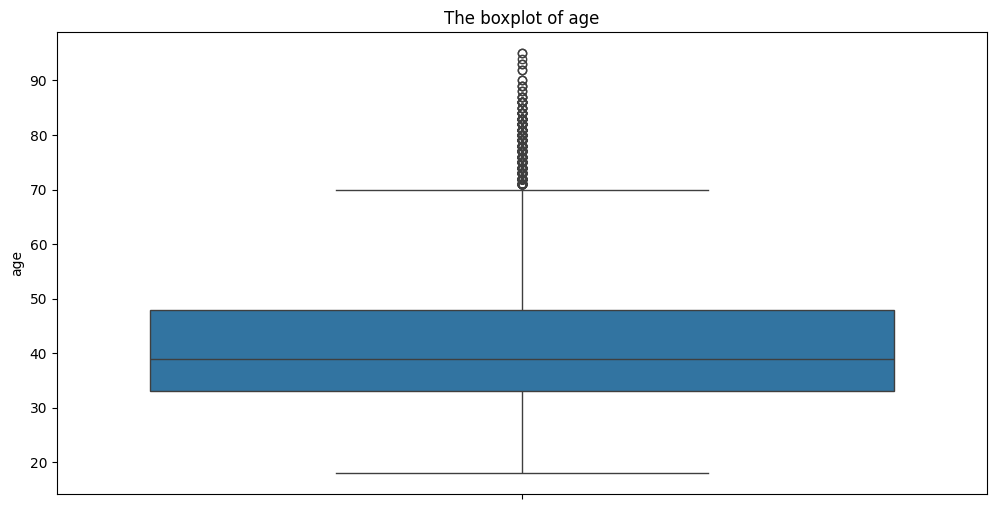

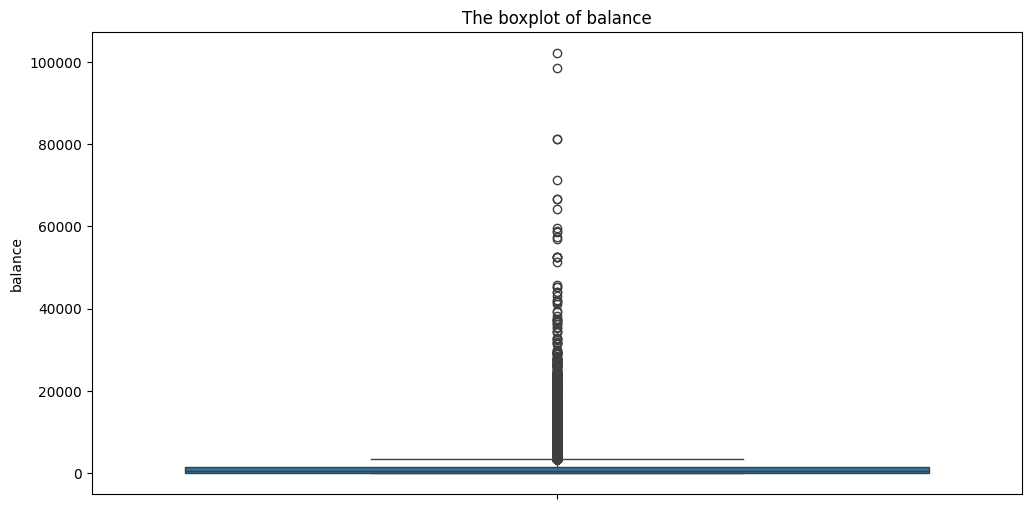

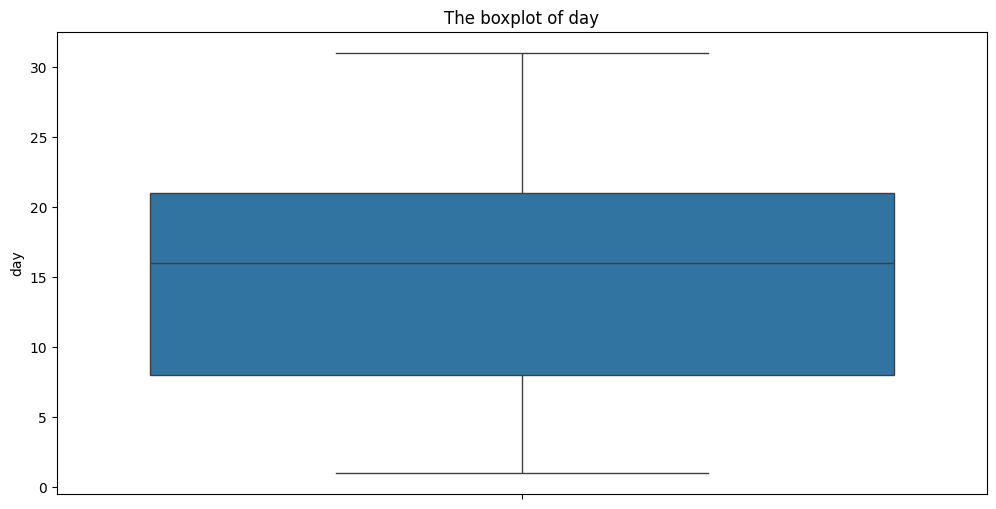

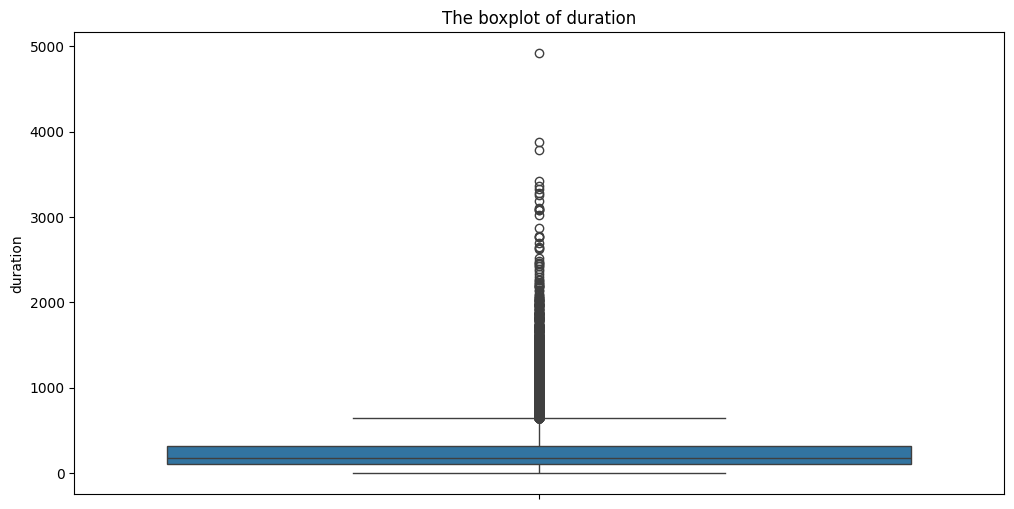

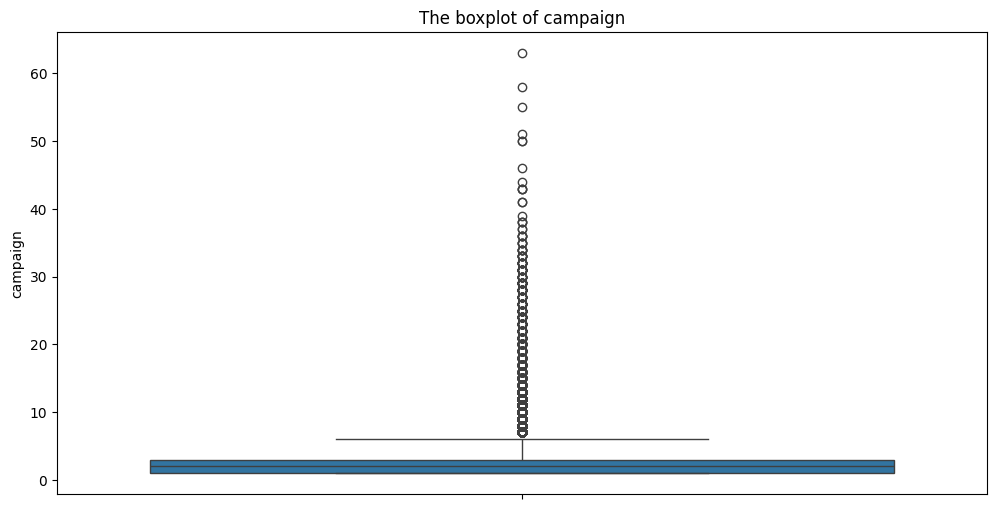

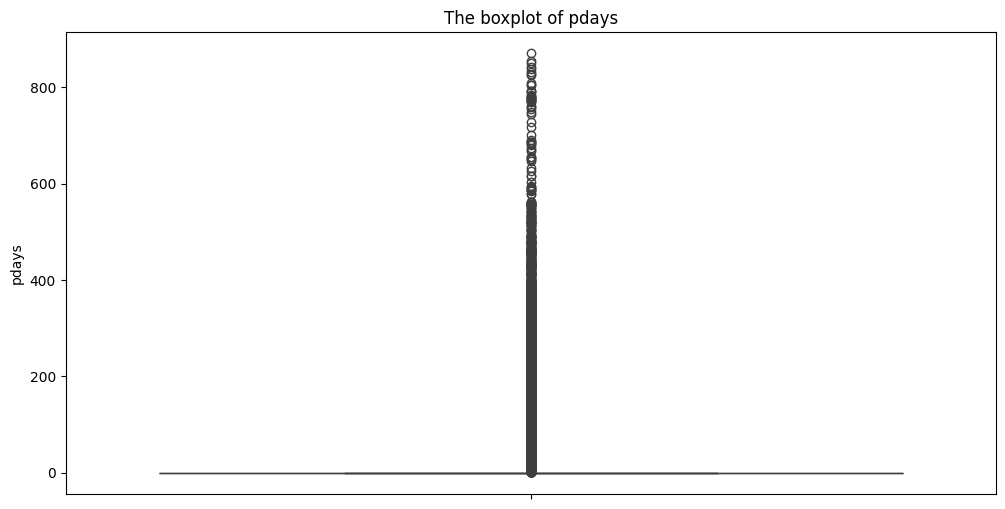

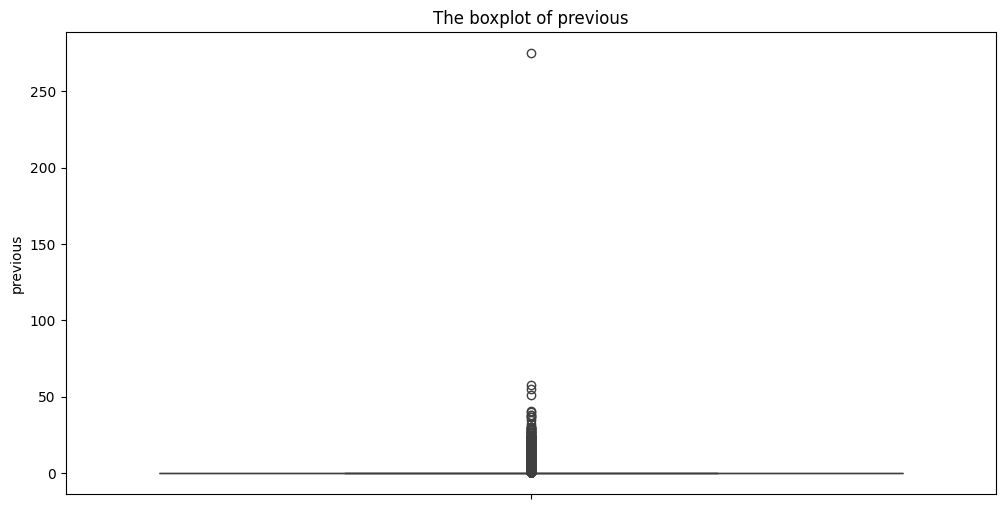

In [34]:
for col in df_cleaned.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(12,6))
  sns.boxplot(df1[col])
  plt.title(f'The boxplot of {col}')
  plt.show()

In [35]:
df_cleaned['age'].min()

18.0

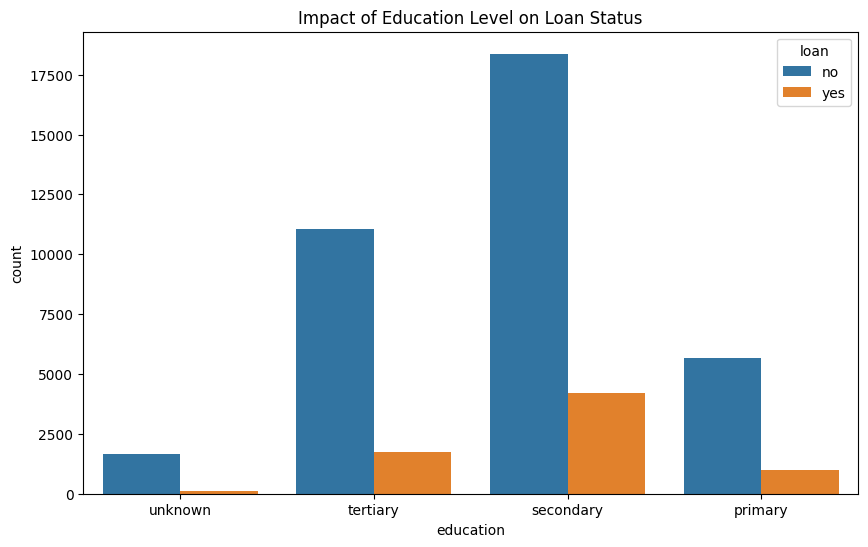

In [36]:

plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='loan', data=df_cleaned)
plt.title('Impact of Education Level on Loan Status')
plt.show()

Most individuals do not have loans, regardless of education level. People with secondary education are the largest group and have the highest number of loans.
Tertiary-educated individuals may be more financially stable, leading to fewer loans.

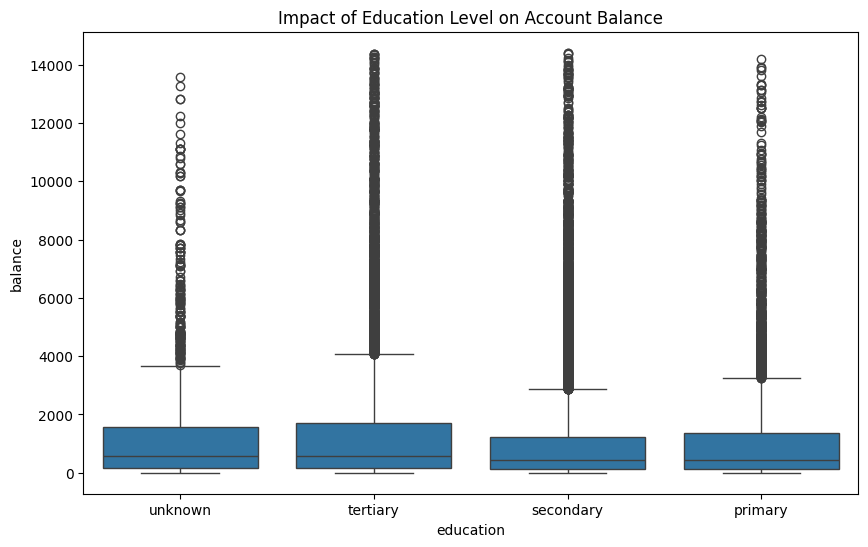

In [37]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='balance', data=df_cleaned)
plt.title('Impact of Education Level on Account Balance')
plt.show()

Education level does not seem to be a strong determinant of account balance.

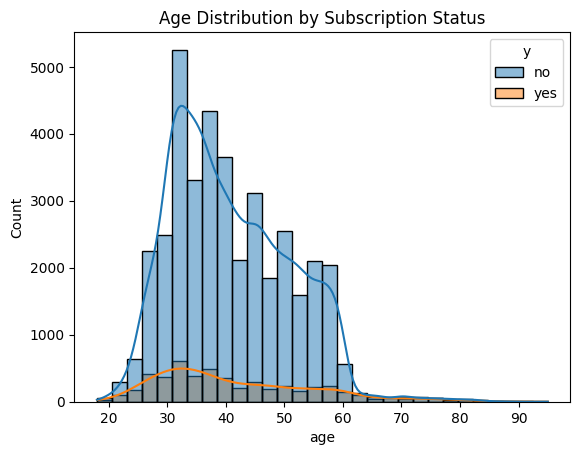

In [38]:
sns.histplot(df_cleaned, x="age", hue="y", bins=30, kde=True)
plt.title("Age Distribution by Subscription Status")
plt.show()


Subscription rates are generally low, but slightly higher among younger individuals (30-40).

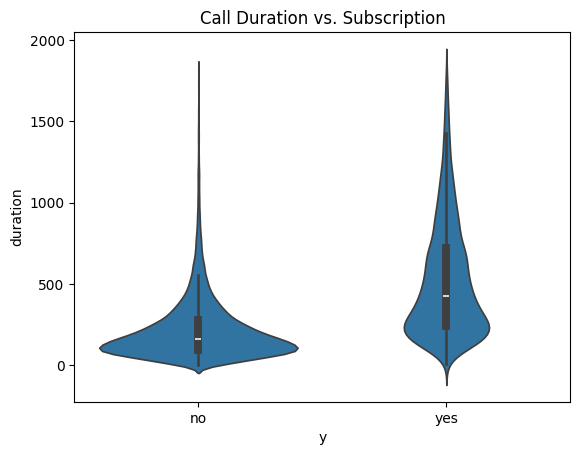

In [39]:
sns.violinplot(x='y', y='duration', data=df_cleaned)
plt.title("Call Duration vs. Subscription")
plt.show()


The distribution shows that longer call durations correlate with higher chances of subscription (y = yes). The majority of non-subscriptions (y = no) occur with short call durations.The majority of non-subscriptions (y = no) occur with short call durations.

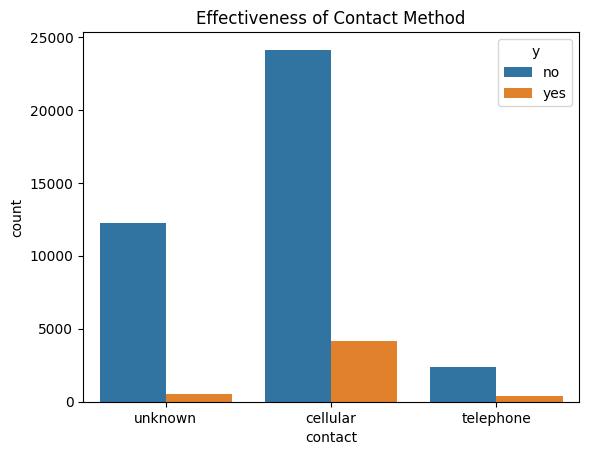

In [40]:
sns.countplot(x="contact", hue="y", data=df_cleaned)
plt.title("Effectiveness of Contact Method")
plt.show()


Cellular contact is most used but has a high rejection rate.

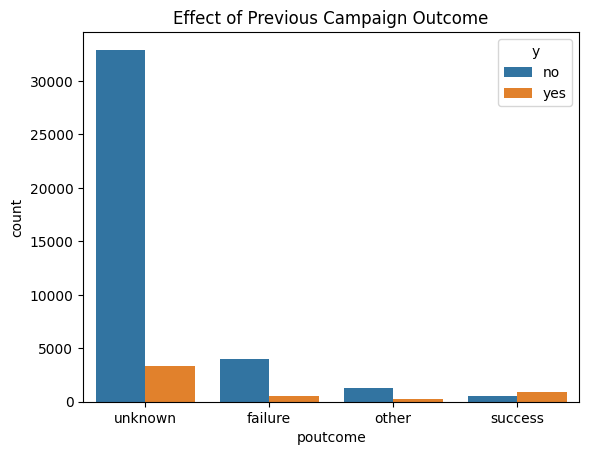

In [41]:
sns.countplot(x="poutcome", hue="y", data=df_cleaned)
plt.title("Effect of Previous Campaign Outcome")
plt.show()


Customers with a previous success have a better conversion rate.Prior campaign success boosts future conversions.

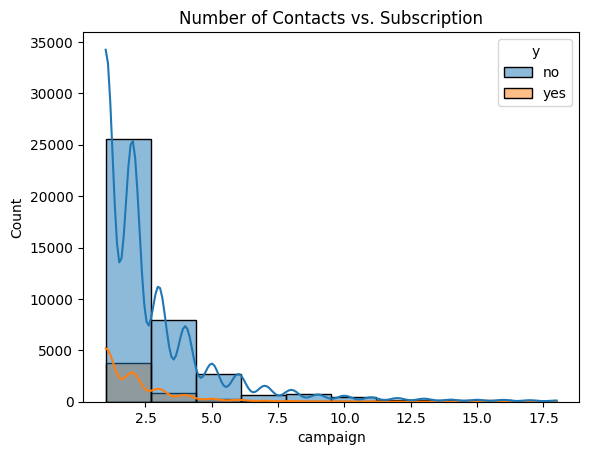

In [42]:
sns.histplot(df_cleaned, x="campaign", hue="y", bins=10, kde=True)
plt.title("Number of Contacts vs. Subscription")
plt.show()


As the number of contacts increases, the subscription rate (y = yes) decreases.

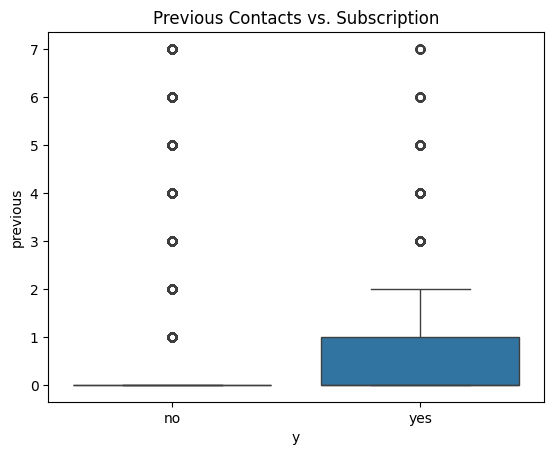

In [43]:
sns.boxplot(x='y', y='previous', data=df_cleaned)
plt.title("Previous Contacts vs. Subscription")
plt.show()


 More previous interactions increase the likelihood of subscription, suggesting follow-ups are effective in converting customers as Customers who subscribed (y = yes) had more previous contacts: Their median and interquartile range are higher than those who did not subscribe..

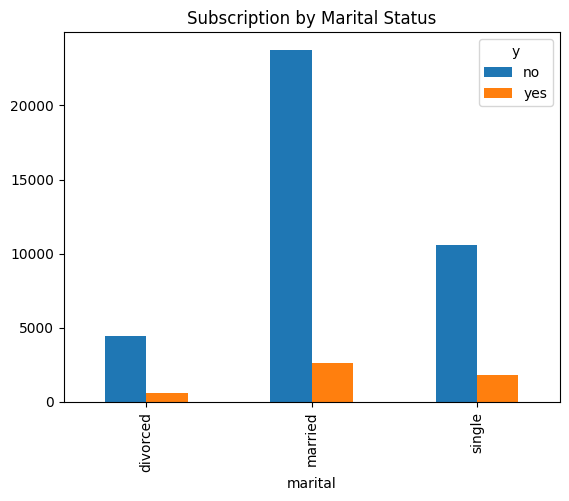

In [44]:
pd.crosstab(df_cleaned['marital'], df_cleaned['y']).plot(kind="bar")
plt.title("Subscription by Marital Status")
plt.show()


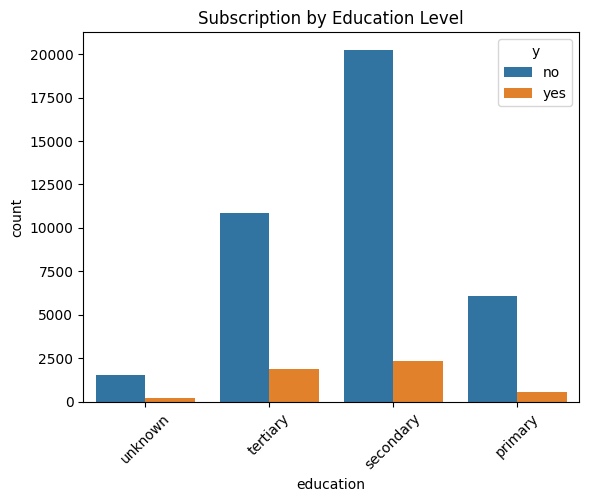

In [45]:
sns.countplot(x='education', hue='y', data=df_cleaned)
plt.xticks(rotation=45)
plt.title("Subscription by Education Level")
plt.show()


In [46]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,0,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,0,0,unknown,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,0,0,unknown,no
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,0,0,unknown,no
10,41.0,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,0,0,unknown,no


In [47]:
cat_columns

,job,marital,education,default,housing,loan,contact,month,poutcome,y
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
5,management,married,tertiary,no,yes,no,unknown,may,unknown,no
6,management,single,tertiary,no,yes,yes,unknown,may,unknown,no
10,admin.,divorced,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in cat_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

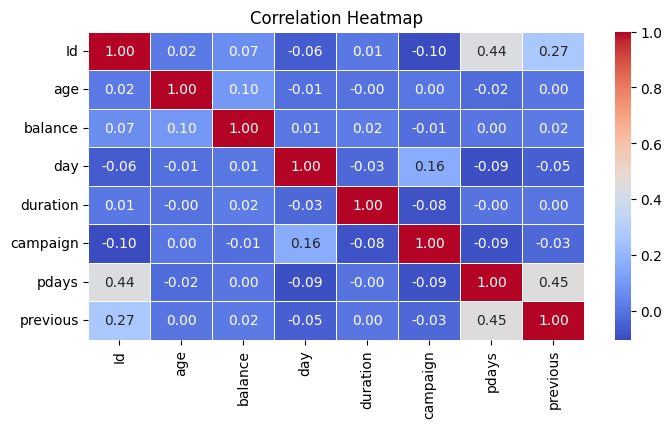

In [49]:
correlation_matrix = num_columns.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

 No much strong multicollinearity exists among the features, and deeper analysis (such as feature engineering or non-linear relationships) is needed.

In [50]:
X=df_cleaned.drop(columns='y')
y=df_cleaned['y']


In [51]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_scaled=scaler.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,stratify=y, random_state=42)

Primary Model

In [53]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            pred = self._sigmoid(linear_pred)

            # Compute cost without regularization
            cost = -(1 / n_samples) * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))
            dw = (1 / n_samples) * np.dot(X.T, (pred - y))
            db = (1 / n_samples) * np.sum(pred - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            self.losses.append(cost)

    def predict(self, X):
        threshold = 0.5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]

        return np.array(y_predicted_cls)


In [54]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_lr)}")
print(f"precission Score = {precision_score(y_test,y_pred_lr)}")
print(f"Recall Score = {recall_score(y_test,y_pred_lr)}")
print(f"F1 Score = {f1_score(y_test,y_pred_lr)}")

Accuracy Score = 0.8854142889751199
precission Score = 1.0
Recall Score = 0.0029791459781529296
F1 Score = 0.005940594059405941


In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [57]:
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_knn)}")
print(f"precission Score = {precision_score(y_test,y_pred_knn)}")
print(f"Recall Score = {recall_score(y_test,y_pred_knn)}")
print(f"F1 Score = {f1_score(y_test,y_pred_knn)}")

Accuracy Score = 0.8980826295366354
precission Score = 0.5910543130990416
Recall Score = 0.36742800397219466
F1 Score = 0.453153704837722


In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [59]:
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_rf)}")
print(f"precission Score = {precision_score(y_test,y_pred_rf)}")
print(f"Recall Score = {recall_score(y_test,y_pred_rf)}")
print(f"F1 Score = {f1_score(y_test,y_pred_rf)}")

Accuracy Score = 0.9150878794795708
precission Score = 0.6683738796414853
Recall Score = 0.5183714001986097
F1 Score = 0.5838926174496645


Hyper parameter tunning

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    "n_neighbors": randint(1, 50),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski", "chebyshev"],
    "p": randint(1, 3),
}

random_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=30, cv=3, scoring="accuracy", random_state=42, n_jobs=-1)

random_search_knn.fit(X_train, y_train)
best_model_knn = random_search_knn.best_estimator_
print("Best Hyperparameters:", random_search_knn.best_params_)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}


In [63]:
best_model_knn.fit(X_train,y_train)
y_pred_knn_hp=best_model_knn.predict(X_test)

In [64]:
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_knn_hp)}")
print(f"precission Score = {precision_score(y_test,y_pred_knn_hp)}")
print(f"Recall Score = {recall_score(y_test,y_pred_knn_hp)}")
print(f"F1 Score = {f1_score(y_test,y_pred_knn_hp)}")

Accuracy Score = 0.9032184432777904
precission Score = 0.6407079646017699
Recall Score = 0.35948361469712015
F1 Score = 0.46055979643765904


For Random FOrest

In [65]:

param_dist = {
    "n_estimators": np.arange(50, 300, 50),
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=20, cv=3, verbose=1, random_state=42, n_jobs=-1)

random_search_rf.fit(X_train, y_train)
best_model_rf = random_search_rf.best_estimator_
print("Best Parameters:", random_search_rf.best_params_)
print("Best Accuracy:", random_search_rf.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None}
Best Accuracy: 0.9144887792256053


In [66]:
best_model_rf

RandomForestClassifier(max_features='log2', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=150)

In [67]:
best_model_rf.fit(X_train,y_train)
y_pred_rf_hp=best_model_rf.predict(X_test)

In [68]:
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_rf_hp)}")
print(f"precission Score = {precision_score(y_test,y_pred_rf_hp)}")
print(f"Recall Score = {recall_score(y_test,y_pred_rf_hp)}")
print(f"F1 Score = {f1_score(y_test,y_pred_rf_hp)}")

Accuracy Score = 0.9171422049760328
precission Score = 0.6812903225806451
Recall Score = 0.5243296921549155
F1 Score = 0.5925925925925926


Feature selection


In [69]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=int(0.8 * X_train.shape[1]))
selector.fit(X, y)
X_train_selected_knn = selector.transform(X_train)
X_test_selected_knn = selector.transform(X_test)
print("Top Features:", X.columns[selector.get_support()].tolist())
print("F-Scores:", selector.scores_[selector.get_support()])

Top Features: ['Id', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
F-Scores: [4141.49479894   69.88292715   89.09754236  200.88501946  210.25425952
  866.65981961  199.08683486  987.99402391 8744.2399284   242.38674326
  469.20547365  994.90159105  250.46635958]


In [70]:
best_model_knn.fit(X_train_selected_knn,y_train)
y_pred_knn_final=best_model_knn.predict(X_test_selected_knn)

In [71]:
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_knn_final)}")
print(f"precission Score = {precision_score(y_test,y_pred_knn_final)}")
print(f"Recall Score = {recall_score(y_test,y_pred_knn_final)}")
print(f"F1 Score = {f1_score(y_test,y_pred_knn_final)}")

Accuracy Score = 0.9009358593928327
precission Score = 0.6179966044142614
Recall Score = 0.3614697120158888
F1 Score = 0.45614035087719296


Random Forest

In [72]:
from sklearn.feature_selection import SelectFromModel

# Use SelectFromModel to keep only important features
selector_rf = SelectFromModel(rf, threshold="median", prefit=True)  # Keep features above median importance
X_train_selected_rf = selector_rf.transform(X_train)
X_test_selected_rf = selector_rf.transform(X_test)

selected_features = X.columns[selector_rf.get_support()]
print("Selected Features:", selected_features.tolist())

Selected Features: ['Id', 'age', 'job', 'balance', 'day', 'month', 'duration', 'pdays', 'poutcome']


In [73]:
best_model_rf.fit(X_train_selected_rf,y_train)
y_pred_rf_final=best_model_rf.predict(X_test_selected_rf)

In [74]:
print(f"Accuracy Score = {accuracy_score(y_test,y_pred_rf_final)}")
print(f"precission Score = {precision_score(y_test,y_pred_rf_final)}")
print(f"Recall Score = {recall_score(y_test,y_pred_rf_final)}")
print(f"F1 Score = {f1_score(y_test,y_pred_rf_final)}")

Accuracy Score = 0.9164574298105456
precission Score = 0.6662636033857315
Recall Score = 0.5471698113207547
F1 Score = 0.6008724100327154


Conclusion:
1. The accuracy of Knn tends to increase after hyperparameter ytun inf but remains same after feature selection (accuracy=0.90).
2. The accuracy of random forest also tends to increase after hyperparameter tuning but no improvement after feature selection (accuracy=0.91)
3. The random forest tends to outperform KNN model.